In [1]:
# python >=3.5 is required
import sys
assert sys.version_info >=(3,5)

# sklearn > 0.20 is requred
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## MNIST 데이터

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist['data'], mnist['target']
X = np.array(X)
y = np.array(y)
y = y.astype(np.uint8)
X.shape

(70000, 784)

In [4]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

Saving figure some_digit_plot


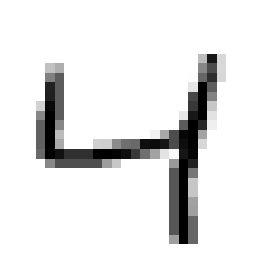

In [5]:
some_digit = X[2]
some_digit = np.array(some_digit)
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis('off')

save_fig('some_digit_plot')
plt.show()

In [6]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap=mpl.cm.binary, interpolation='nearest')
    plt.axis('off')

In [7]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


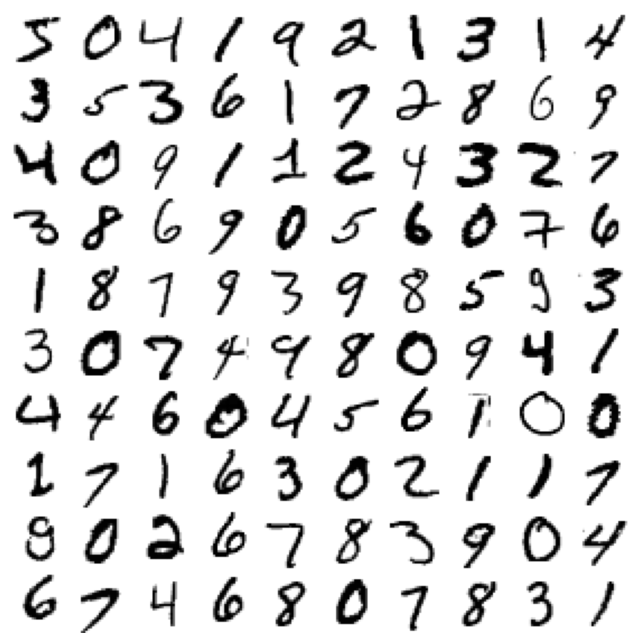

In [8]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig('more_digits_plot')
plt.show()

In [9]:
y[0]

5

In [24]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

## 이진분류기(Binary Classifier)
문제를 단순화시켜 숫자 5만 식별

In [25]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [26]:
y_train_5

array([ True, False, False, ...,  True, False, False])

로지스틱 회귀 모델을 사용

In [13]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state=0).fit(X_train, y_train_5)

c:\users\함석현\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
log_clf.predict([X[0], X[1], X[2]])

array([ True, False, False])

교차검증을 수행

In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_clf, X_train, y_train_5, cv=3, scoring='accuracy')

c:\users\함석현\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\함석현\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

array([0.97525, 0.9732 , 0.9732 ])

모든 교차 검증 폴드에 대해 정확도가 0.97이상이다. 그렇다면 이 모델은 좋은 모델인가?

In [27]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, x, y=None):
        pass
    def predict(self, X):
        return np.zeros(len(X), dtype=bool)

In [28]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [29]:
never_5_clf.predict(X)

array([False, False, False, ..., False, False, False])

이미지의 10%만 숫자 5이기 때문에 무조건 5가 아닌 것으로 예측하면 정확도는 90%가 된다. 목표값(클래스)들이 불균형인 경우에 정확도(accuracy)는 좋은 지표가 아니다.

## 오차행렬(Confusion Matrix)

In [31]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(log_clf, X_train, y_train_5, cv=3)

c:\users\함석현\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\함석현\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[54038,   541],
       [ 1026,  4395]], dtype=int64)

### precision = $\frac{TP}{TP+FP}$ (정밀도)

### recall = $\frac{TP}{TP+FN}$ (재현율)

In [33]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8903970826580226

In [34]:
recall_score(y_train_5, y_train_pred)

0.8107360265633647

In [35]:
confusion_matrix(y_train_5, never_5_clf.predict(X)[:60000])

array([[54579,     0],
       [ 5421,     0]], dtype=int64)

In [36]:
precision_score(y_train_5, never_5_clf.predict(X)[:60000])

c:\users\함석현\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [37]:
recall_score(y_train_5, never_5_clf.predict(X)[:60000])

0.0

## Error cases 조사하기

In [38]:
errors = (y_train_pred != y_train_5)
errors

array([False, False, False, ..., False, False, False])

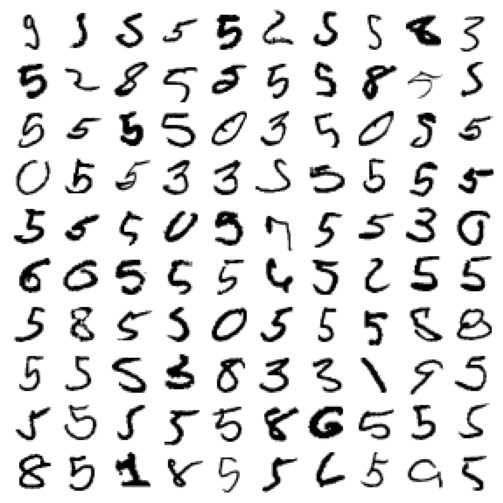

In [39]:
plt.figure(figsize=(9,9))
plot_digits(X_train[errors][:100], images_per_row=10)
plt.show()

## Precision/Recall Trade-off

In [40]:
for i in range(len(errors)):
    if errors[i]:
        print(i)

48
132
138
173
244
262
278
502
528
540
554
558
559
610
635
690
748
769
778
832
836
899
916
924
1015
1021
1024
1029
1032
1089
1102
1104
1111
1145
1151
1222
1276
1278
1298
1311
1324
1325
1328
1346
1356
1376
1468
1587
1651
1682
1784
1930
1961
2000
2028
2148
2172
2184
2209
2211
2272
2302
2308
2368
2373
2395
2428
2566
2622
2636
2744
2758
2780
2803
2958
3013
3034
3070
3095
3204
3205
3216
3289
3401
3416
3502
3524
3580
3638
3648
3872
4004
4066
4148
4184
4192
4231
4304
4362
4416
4475
4562
4590
4596
4622
4645
4665
4666
4786
4801
4820
4847
4908
4941
5066
5080
5157
5177
5188
5250
5255
5303
5382
5506
5526
5554
5632
5666
5678
5737
5738
5752
5757
5771
5798
5839
5847
5857
5904
5925
5947
5956
6066
6086
6096
6106
6171
6236
6370
6418
6428
6450
6472
6504
6636
6644
6735
6836
6844
6848
6895
6920
6929
6943
7032
7044
7080
7112
7134
7216
7232
7270
7281
7286
7346
7354
7368
7374
7498
7544
7546
7584
7639
7833
7842
7884
7917
7962
8009
8062
8178
8190
8307
8339
8414
8419
8435
8488
8504
8549
8606
8623
8624
8639
8662


In [42]:
y_train_pred[48], y_train_5[48]

(True, False)

In [43]:
some_digit = X_train[48]

y_scores = log_clf.decision_function([some_digit])
y_scores

array([0.22419047])

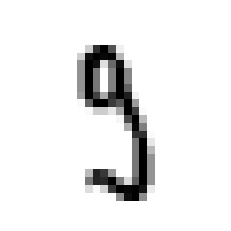

In [45]:
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis('off')
plt.show()

In [46]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [52]:
threshold = 0.5
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [53]:
y_scores = cross_val_predict(log_clf, X_train, y_train_5, cv=3, method='decision_function')

c:\users\함석현\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\함석현\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [55]:
y_scores.shape

(60000,)

In [57]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [60]:
precisions.shape

(59897,)

In [62]:
thresholds.shape

(59896,)

In [74]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, 'b-', linewidth=2)
    plt.xlabel('Recall', fontsize=16)
    plt.ylabel('Precision', fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

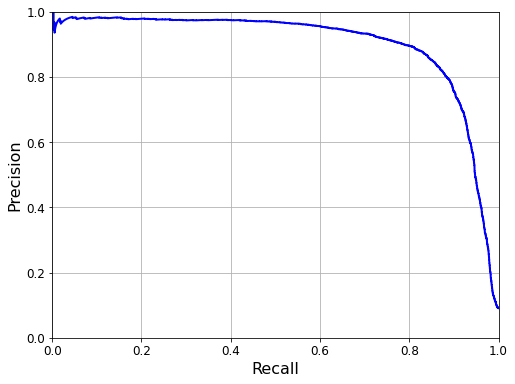

In [75]:
plt.figure(figsize=(8 ,6))
plot_precision_vs_recall(precisions, recalls)

## 다중분류(Multiclass Classification)

In [76]:
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class = 'multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X_train, y_train)

c:\users\함석현\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, multi_class='multinomial')

In [77]:
softmax_reg.predict(X_train)[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [78]:
from sklearn.metrics import accuracy_score

y_pred = softmax_reg.predict(X_test)
accuracy_score(y_pred, y_test)

0.9243

##  Data Augumentation

In [79]:
from scipy.ndimage.interpolation import shift

In [80]:
def shift_image(image, dx, dy):
    image = image.reshape(28, 28)
    shifted_image = shift(image, [dy, dx], cval=0, mode='constant')
    return shifted_image.reshape([-1])

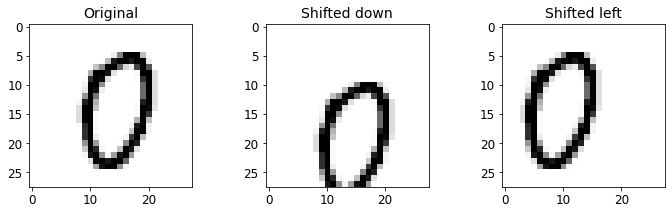

In [85]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title('Original', fontsize=14)
plt.imshow(image.reshape(28,28), interpolation='nearest', cmap='Greys')
plt.subplot(132)
plt.title('Shifted down', fontsize=14)
plt.imshow(shifted_image_down.reshape(28,28), interpolation='nearest', cmap='Greys')
plt.subplot(133)
plt.title('Shifted left', fontsize=14)
plt.imshow(shifted_image_left.reshape(28,28), interpolation='nearest', cmap='Greys')
plt.show()

In [87]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [90]:
X_train_augmented.shape

(300000, 784)

In [91]:
# 같은 label을 가진 데이터가 4개 단위로 연속되게 되므로 셔플을 시켜준다.
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [92]:
softmax_reg_augmented = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg_augmented.fit(X_train_augmented, y_train_augmented)

c:\users\함석현\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, multi_class='multinomial')

In [94]:
y_pred = softmax_reg_augmented.predict(X_test)
accuracy_score(y_pred, y_test)

0.9279